In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [85]:
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
import skimage.color 
from skimage.transform import resize,rotate
import colorsys
import cv2
import imutils

# Importing given Images

In [4]:
test1 = cv2.imread("/content/drive/MyDrive/AIP/A2/test1.jpg")
test2 = cv2.imread("/content/drive/MyDrive/AIP/A2/test2.jpg")
test3 = cv2.imread("/content/drive/MyDrive/AIP/A2/test3.jpg")
test4 = cv2.imread("/content/drive/MyDrive/AIP/A2/test4.jpg")
test5 = cv2.imread("/content/drive/MyDrive/AIP/A2/test5.jpg")

In [5]:
test_list = [test1,test2,test3,test5]

# Functions to compute similarity matrices

In [86]:
# Similarity = comparing R+G+B/3

def compute_similarity_matrix_1(image):
  r = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
  r = np.sum(r,axis = 1)/3
  n = len(r)
  W = np.zeros((n,n))
  for i in range(n):
      for j in range(i+1, n):
          d = (r[i]-r[j])**2
          W[i, j] = np.exp(-d/5)
          W[j, i] = W[i, j]
  return W

# Similarity = comparing Gray

def compute_similarity_matrix_2(image):
  #r = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  r = skimage.color.rgb2gray(image)
  r = r.flatten()
  n = len(r)
  W = np.zeros((n,n))
  for i in range(n):
      for j in range(i+1, n):
          d = (r[i]-r[j])**2
          W[i, j] = np.exp(-d/10)
          W[j, i] = W[i, j]
  return W




# Normalized Cut Algorithm

In [87]:
def normalized_cut(W, num_clusters):
  D = np.zeros(W.shape)
  D = np.diag(W.sum(axis=1))
  eigenvalues, eigenvectors = eigsh(D-W, k=2, M=D, which="SM")
  eigenvalues = eigenvalues[1]
  eigenvectors = eigenvectors[:,1]
  median = np.median(eigenvectors)
  out = np.reshape(eigenvectors,(50,50))
  out = np.where(out > median,1,0)
  return out

def image_segmentation(image, num_clusters):
    width = 50
    height = 50 
    dim = (width, height)
    #image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    b,g,r=cv2.split(image)
    image=cv2.merge([r,g,b])
    resized_image = cv2.resize(image,dim, interpolation = cv2.INTER_LANCZOS4)
  
    W1 = compute_similarity_matrix_1(resized_image)
    W2 = compute_similarity_matrix_2(resized_image)

    # Perform image segmentation using the N-Cut algorithm
    seg_img1 = normalized_cut(W1, num_clusters)
    seg_img2 = normalized_cut(W2, num_clusters)

    fig, axis = plt.subplots(ncols = 3, squeeze = False, figsize = (10,10))
    axis[0,0].imshow(image)
    axis[0,1].imshow(seg_img1,cmap = 'gray')
    axis[0,2].imshow(seg_img2,cmap = 'gray')
    axis[0,0].title.set_text('Original Image')
    axis[0,1].title.set_text('Similarity 1')
    axis[0,2].title.set_text('Similarity 2 ')
    plt.show()


# PART A

<ipython-input-117-8bc433ebc543>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (r[i]-r[j])**2


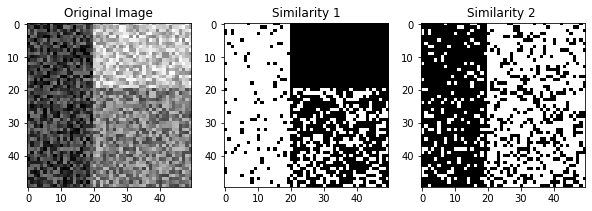

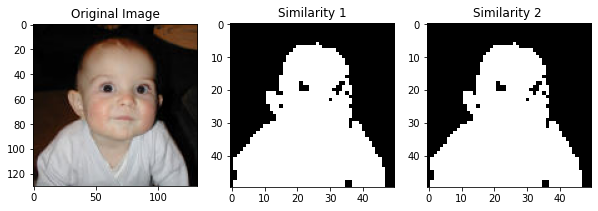

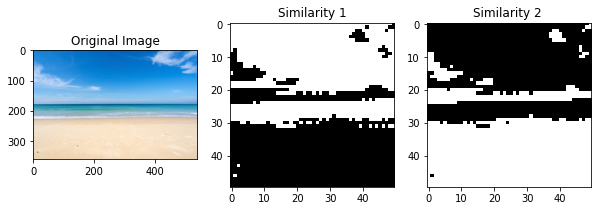

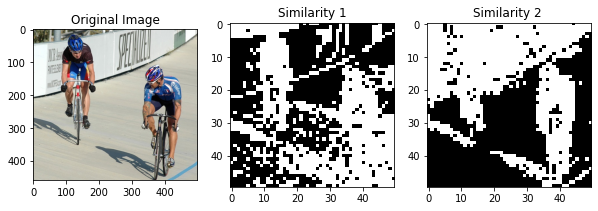

In [126]:
for i in test_list:
  image_segmentation(i,2)

# PART B: ROTATION

<ipython-input-6-8bc433ebc543>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (r[i]-r[j])**2


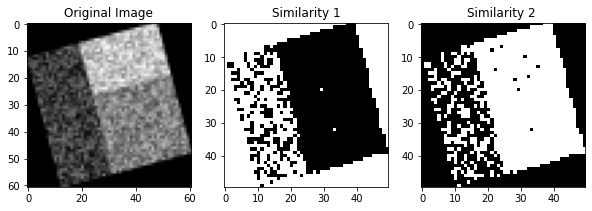

In [8]:
test1_r = imutils.rotate_bound(test1, -15)
image_segmentation(test1_r,2)

<ipython-input-6-8bc433ebc543>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (r[i]-r[j])**2


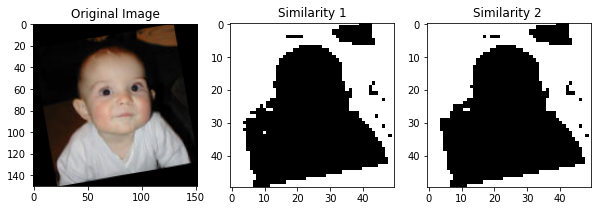

In [12]:
test2_r = imutils.rotate_bound(test2, -10)
image_segmentation(test2_r,2)

<ipython-input-6-8bc433ebc543>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (r[i]-r[j])**2


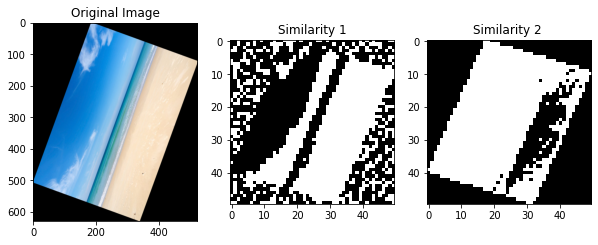

In [13]:
test3_r = imutils.rotate_bound(test3, -70)
image_segmentation(test3_r,2)

<ipython-input-6-8bc433ebc543>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  d = (r[i]-r[j])**2


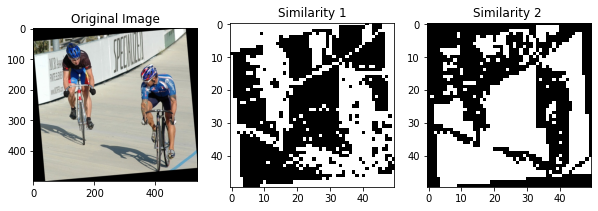

In [27]:
test5_r = imutils.rotate_bound(test5, -5)
image_segmentation(test5_r,2)

# PART B: GAUSSIAN NOISE

In [89]:
test_noise1 = [skimage.util.random_noise(image, mode='gaussian') for image in test_list]

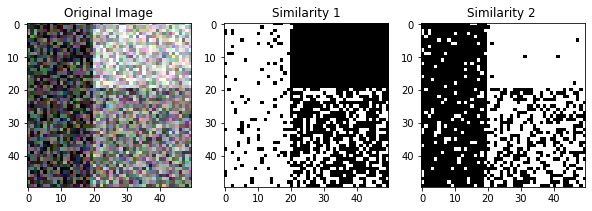

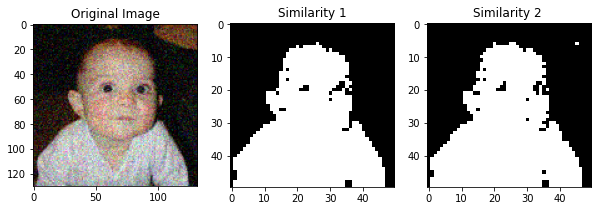

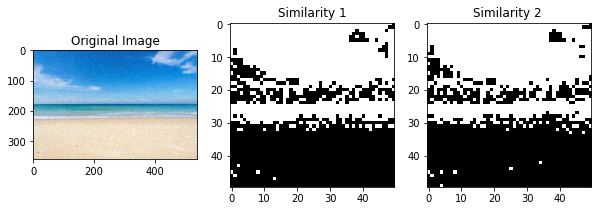

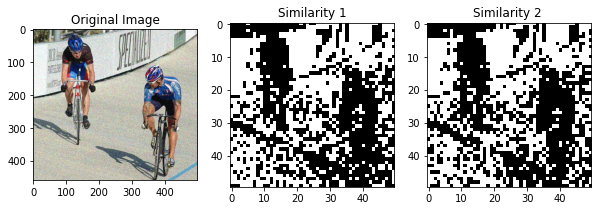

In [90]:
for i in test_noise1:
  image_segmentation(i,2)

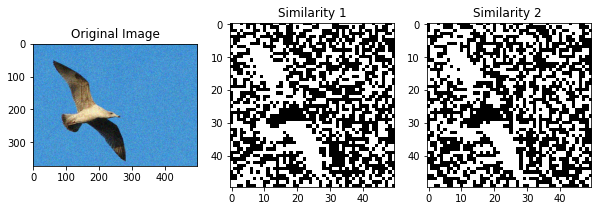

In [91]:
image_segmentation(skimage.util.random_noise(test4, mode='gaussian'),2)